In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from typing import List, Set, Dict, Tuple, Optional
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
loans = pd.read_csv("/content/drive/MyDrive/rejected_2007_to_2018Q4.csv.gz",low_memory=False)


In [ ]:
rejected=loans

## **Basic Checks:**

In [ ]:
rejected.head()

,Amount Requested,Application Date,Loan Title,Risk_Score,Debt-To-Income Ratio,Zip Code,State,Employment Length,Policy Code
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10%,481xx,NM,4 years,0.0
1,1000.0,2007-05-26,Consolidating Debt,703.0,10%,010xx,MA,< 1 year,0.0
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10%,212xx,MD,1 year,0.0
3,6000.0,2007-05-27,waksman,698.0,38.64%,017xx,MA,< 1 year,0.0
4,1500.0,2007-05-27,mdrigo,509.0,9.43%,209xx,MD,< 1 year,0.0


In [ ]:
rejected.shape

(27648741, 9)

In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 9 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   Employment Length     object 
 8   Policy Code           float64
dtypes: float64(3), object(6)
memory usage: 1.9+ GB


## **Descriptive statistics**

In [ ]:
float_columns = rejected.select_dtypes(include=['float'])
float_description = float_columns.describe().apply(lambda x: x.round(2))
float_description

,Amount Requested,Risk_Score,Policy Code
count,27648741.00,9151111.00,27647823.00
mean,13133.24,628.17,0.01
std,15009.64,89.94,0.11
min,0.00,0.00,0.00
25%,4800.00,591.00,0.00
50%,10000.00,637.00,0.00
75%,20000.00,675.00,0.00
max,1400000.00,990.00,2.00


**Observation:**

Amount Requested: The average requested amount for loans is approximately  13,133.24 𝑤𝑖𝑡ℎ 𝑎 𝑠𝑡𝑎𝑛𝑑𝑎𝑟𝑑 𝑑𝑒𝑣𝑖𝑎𝑡𝑖𝑜𝑛 𝑜𝑓
 15,009.64. The minimum requested amount is  0.00.𝑎𝑛𝑑 𝑡ℎ𝑒 𝑚𝑎𝑥𝑖𝑚𝑢𝑚 𝑟𝑒𝑞𝑢𝑒𝑠𝑡𝑒𝑑 𝑎𝑚𝑜𝑢𝑛𝑡𝑖𝑠
 1,400,000. The majority of requested amounts fall within the range of  4,800 𝑡𝑜
 20,000.

Risk Score: The average risk score is approximately 628.17, with a standard deviation of 89.94. The minimum risk score is 0, and the maximum risk score is 990. The majority of risk scores range between 591 and 675.

Policy Code: The policy code is a categorical variable with values ranging from 0 to 2. The majority of the data points have a policy code of 0, indicating a specific policy category.

In [ ]:
rejected.describe(include="object")

,Application Date,Loan Title,Debt-To-Income Ratio,Zip Code,State,Employment Length
count,27648741,27647438,27648741,27648448,27648719,26697386
unique,4238,73928,126145,1001,51,11
top,2018-12-04,Debt consolidation,100%,112xx,CA,< 1 year
freq,42112,6418016,1362556,267102,3242169,22994315


Observation:

Application Date: The dataset spans a period of 4,238 unique application dates. The most common application date is 2018-12-04, which appears 42,112 times.

Loan Title: There are a total of 73,928 unique loan titles in the dataset. The most frequently occurring loan title is "Debt consolidation," which appears 6,418,016 times.

Debt-To-Income Ratio: The dataset contains 1,261,45 unique debt-to-income ratio values. The most common debt-to-income ratio is 100%, which appears 1,362,556 times.

Zip Code: There are 1,001 unique zip codes in the dataset. The most common zip code is 112xx, which appears 267,102 times.

State: The dataset includes data from 51 different states. The state with the highest frequency is California (CA), which appears 3,242,169 times.

Employment Length: The employment length column consists of 11 unique categories. The most frequent category is "< 1 year," which appears 22,994,315 times.

In [ ]:
rejected.isnull().sum()

Amount Requested               0
Application Date               0
Loan Title                  1303
Risk_Score              18497630
Debt-To-Income Ratio           0
Zip Code                     293
State                         22
Employment Length         951355
Policy Code                  918
dtype: int64

In [ ]:
rejected = rejected.drop(columns=["Policy Code"])

Policy code has only one vlaue so dropping it

In [ ]:
rejected["Employment Length"] = rejected["Employment Length"].astype(str).str.replace('<', '').str.replace('s', '').str.replace('+', '').str.replace('year', '')
rejected.rename(columns={"Employment Length": "emp_length"}, inplace=True)


<ipython-input-12-17f41ed0f697>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  rejected["Employment Length"] = rejected["Employment Length"].astype(str).str.replace('<', '').str.replace('s', '').str.replace('+', '').str.replace('year', '')


In [ ]:
rejected["emp_length"].unique()

array(['4 ', ' 1 ', '1 ', '3 ', '2 ', '10 ', '9 ', '5 ', '7 ', '6 ', '8 ',
       'nan'], dtype=object)

In [ ]:
rejected["emp_length"]= rejected["emp_length"].apply(lambda x: np.nan if x == 'nan' else float(x))

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

imputer.fit(rejected[['emp_length']])

rejected['emp_length'] = imputer.transform(rejected[['emp_length']])

In [ ]:
rejected['Loan Title'].fillna('Other', inplace=True)
rejected['Zip Code'].fillna(rejected['Zip Code'].mode()[0], inplace=True)
rejected['State'].fillna(rejected['State'].mode()[0], inplace=True)


In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Amount Requested      float64
 1   Application Date      object 
 2   Loan Title            object 
 3   Risk_Score            float64
 4   Debt-To-Income Ratio  object 
 5   Zip Code              object 
 6   State                 object 
 7   emp_length            float64
dtypes: float64(3), object(5)
memory usage: 1.6+ GB


In [ ]:
rejected.rename(columns=lambda x: x.lower(), inplace=True)


In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 8 columns):
 #   Column                Dtype  
---  ------                -----  
 0   amount requested      float64
 1   application date      object 
 2   loan title            object 
 3   risk_score            float64
 4   debt-to-income ratio  object 
 5   zip code              object 
 6   state                 object 
 7   emp_length            float64
dtypes: float64(3), object(5)
memory usage: 1.6+ GB


In [ ]:
rejected['debt-to-income ratio'].unique()

array(['10%', '38.64%', '9.43%', ..., '1986.02%', '1154.55%', '21215.75%'],
      dtype=object)

In [ ]:
rejected['debt-to-income ratio'] = rejected['debt-to-income ratio'].str.replace('%', '')


In [ ]:
rejected['debt-to-income ratio'].unique()

array(['10', '38.64', '9.43', ..., '1986.02', '1154.55', '21215.75'],
      dtype=object)

In [ ]:
rejected['debt-to-income ratio'] = rejected['debt-to-income ratio'].astype(float)


In [ ]:
rejected.rename(columns={
    'amount requested': 'amount_requested',
    'application date': 'date',
    'loan title': 'loan_purpose',
    'risk_score': 'fico_score',
    'debt-to-income ratio': 'dti'
}, inplace=True)

In [ ]:
rejected['date'] = pd.to_datetime(rejected['date'])


In [ ]:
rejected = rejected.drop('zip code', axis=1)


In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 7 columns):
 #   Column            Dtype         
---  ------            -----         
 0   amount_requested  float64       
 1   date              datetime64[ns]
 2   loan_purpose      object        
 3   fico_score        float64       
 4   dti               float64       
 5   state             object        
 6   emp_length        float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 1.4+ GB


In [ ]:
rejected["loan_progress"] = "rejected"

In [ ]:
rejected.head(3)

,amount_requested,date,loan_purpose,fico_score,dti,state,emp_length,loan_progress
0,1000.0,2007-05-26,Wedding Covered but No Honeymoon,693.0,10.0,NM,4.0,rejected
1,1000.0,2007-05-26,Consolidating Debt,703.0,10.0,MA,1.0,rejected
2,11000.0,2007-05-27,Want to consolidate my debt,715.0,10.0,MD,1.0,rejected


In [ ]:
rejected.isna().sum()

amount_requested           0
date                       0
loan_purpose               0
fico_score          18497630
dti                        0
state                      0
emp_length                 0
loan_progress              0
dtype: int64

In [ ]:
mean_score = rejected["fico_score"].mean()
rejected["fico_score"].fillna(mean_score, inplace=True)

In [ ]:
rejected.isna().sum()


amount_requested    0
date                0
loan_purpose        0
fico_score          0
dti                 0
state               0
emp_length          0
loan_progress       0
dtype: int64

In [ ]:
# Checking outliers
numeric_columns_ = ['amount_requested', 'fico_score', 'dti',"emp_length"]

print(numeric_columns_)

['amount_requested', 'fico_score', 'dti', 'emp_length']


In [ ]:
def plot_numeric_outliers(data, numeric_columns, nrows, ncols, figsize):
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)

    for i, column in enumerate(numeric_columns):
        row = i // ncols
        col = i % ncols
        ax = axes[row, col]
        sns.boxplot(x=data[column], color="#1a5899", ax=ax)
        ax.set_xlabel(column, labelpad=12, fontdict={"fontsize": 16})

    # Remove empty subplots
    for i in range(len(numeric_columns), len(axes.flatten())):
        fig.delaxes(axes.flatten()[i])

<function matplotlib.pyplot.show(close=None, block=None)>

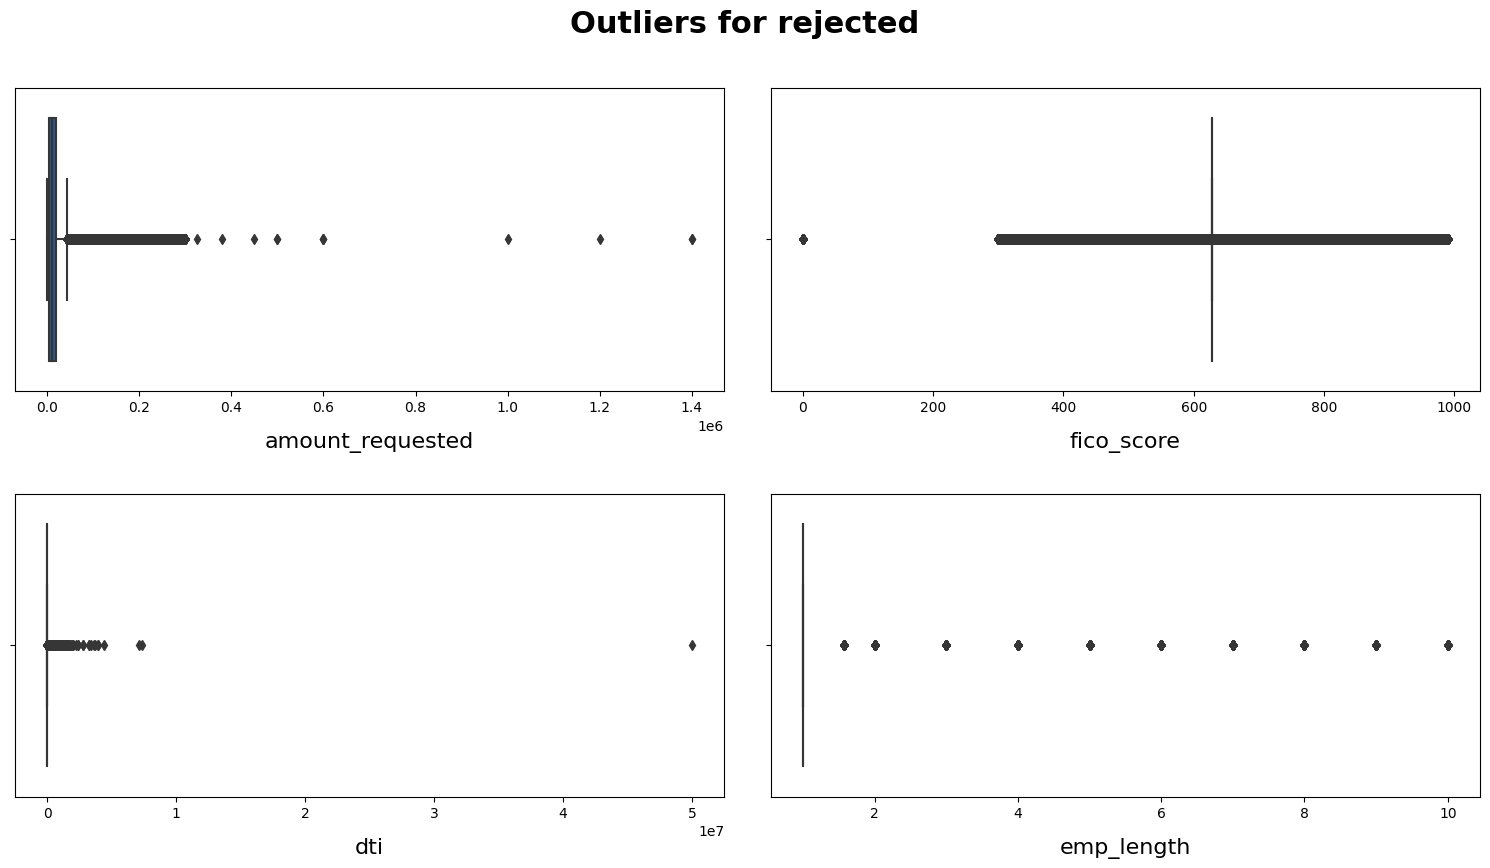

In [ ]:
plot_numeric_outliers(rejected, numeric_columns_, nrows=5, ncols=2, figsize=(15, 20))

plt.suptitle("Outliers for rejected", fontsize=22, fontweight="semibold", y=1.01)

# Show the plot

plt.tight_layout(h_pad=3, w_pad=3)
plt.show

Observation:

Some outliers are identified, However these are important part of the analysis hence non removing it

Observation from rejected:

California is where most rejected applicants come from.

The requested amount, 166,650, is much higher than what LendingClub usually offers.

The minimum required credit score is 600, but the minimum FICO score accepted is 300.

Most rejected applications are for debt consolidation, combining debts into one loan.

The debt-to-income ratio (DTI) shows how much of a person's monthly income goes toward paying debts. Lenders prefer a DTI of 40% or lower for personal loans. But sometimes, people with higher DTIs and good credit may still be considered.

A DTI of 0% means no debts or expenses to pay.

If the DTI is over 100%, it means monthly debts are more than monthly income. People with DTIs over 100% rarely get loans.

That's why I don't accept applicants with DTIs over 100%.
Most rejected applicants have less than one year of work experience.

In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   amount_requested  float64       
 1   date              datetime64[ns]
 2   loan_purpose      object        
 3   fico_score        float64       
 4   dti               float64       
 5   state             object        
 6   emp_length        float64       
 7   loan_progress     object        
dtypes: datetime64[ns](1), float64(4), object(3)
memory usage: 1.6+ GB


In [ ]:
# downsizing memory
cat_columns = ['loan_purpose', 'state', 'loan_progress']
for column in cat_columns:
    rejected[column] = rejected[column].astype('category')

# Downcast numeric columns
numeric_columns = ['amount_requested', 'fico_score', 'dti', 'emp_length']
for column in numeric_columns:
    rejected[column] = pd.to_numeric(rejected[column], downcast='float')



In [ ]:
rejected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27648741 entries, 0 to 27648740
Data columns (total 8 columns):
 #   Column            Dtype         
---  ------            -----         
 0   amount_requested  float64       
 1   date              datetime64[ns]
 2   loan_purpose      category      
 3   fico_score        float32       
 4   dti               float64       
 5   state             category      
 6   emp_length        float32       
 7   loan_progress     category      
dtypes: category(3), datetime64[ns](1), float32(2), float64(2)
memory usage: 1004.6 MB


In [ ]:
subset_rejected = rejected[['amount_requested', 'date', 'loan_purpose', 'fico_score', 'dti', 'state', 'emp_length', 'loan_progress']]

# Save the DataFrame to a new CSV file with compression
subset_rejected.to_csv('subset_rejected_v11.csv', compression='gzip', index=False, encoding='utf-8')
